# Introducción


Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales.

El objetivo del proyecto es desarrolar un modelo de machine learning, que permita predecir que clientes se fugaran

El equipo de marketing de Interconnect ha proporcionado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

# Tabla de contenidos

* [1- Análisis exploratorio de datos](#chapter1)
    * [1-1 Importación de librerias](#section_1_1)
    * [1-2 Carga de datos y análisis preliminares](#section_1_2)
    * [1-3 Preparación de los datos](#section_1_3)
    
* [2 - Hipotesis](#chapter2)
    * [2-1 Analisis de datos](#section_2_1)
    * [2-2 Conclusiones](#section_2_2)

* [3 - Plan de trabajo](#chapter2)

* [4 - SOlucion de codigo](#chapter4)
  * [4-1 Preparación de los datos](#section_4_1)
  * [4-2 Desarrollo de modelos](#section_4_2)

* [5 - Informe](#chapter5)



# 1- Análisis exploratorio de datos <a class="anchor" id="chapter1"></a>





 1_1 Importación de las librerias <a class="anchor" id="section_1_1"></a>


In [1]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.optimizers import Adam
from keras.layers import Dropout



 1_2 Carga de datos y análisis preliminares <a class="anchor" id="section_1_2"></a>


In [2]:
#Carga de los datos de contrato
df_contract= pd.read_csv('/content/contract.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


- Los datos de contrato, no presentan valores ausentes, tienen tipo de datos que deben ser corregidos ya que no se corresponden con el tipo de variable que describen: BeginDate y total charges. La variable End date, contiene fechas y cadenas, por lo que se deja como "object"

In [5]:
#se ajustan los datos de datos de Fecha de inicio
df_contract['BeginDate']= pd.to_datetime(df_contract['BeginDate'], format= '%Y-%m-%d')
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [6]:
#se ajustan los datos de datos de Total charges
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


- Luego de la conversion de datos de total Charges, aparecen valores ausentes que seran tratados posteriormente

In [7]:
#verificacion de duplicados
df_contract.duplicated().sum()

0

In [8]:
#Carga de los datos de internet
df_internet= pd.read_csv('/content/internet.csv')

In [9]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
df_internet.duplicated().sum()

0

- Los datos de internet no presentan valores ausentes ni duplicados y son del tipo correcto

In [12]:
#Carga de los datos de personal
df_personal= pd.read_csv('/content/personal.csv')

In [13]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:

df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
df_personal.duplicated().sum()


0

- Los datos de "personel" no presentan valores ausentes ni duplicados y son del tipo correcto

In [16]:
#Carga de los datos de phone
df_phone= pd.read_csv('/content/phone.csv')

In [17]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [18]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- Los datos de "phone" no presentan valores ausentes ni duplicados y son del tipo correcto

 1_3 Preparación de los datos <a class="anchor" id="section_1_3"></a>


In [19]:
#Union de tablas

merged_df = df_contract.merge(df_internet, on='customerID', how='outer').merge(df_personal, on='customerID', how='outer').merge(df_phone, on='customerID', how='outer')


In [20]:
merged_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [21]:
#se genera una nueva variable que indica si el cliente se fugo o no

merged_df['churn'] = 0
merged_df['churn'] = merged_df['churn'].where(merged_df['EndDate']=="No",1)
merged_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,NaN,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,1


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

In [23]:
#verificaion de ausentes

merged_df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
churn                  0
dtype: int64

- Los datos provenientes de la tabla internet y telefono cuentan con valores ausentes debido a que no todos los clientes cuentan con ese servicio. Por tal motivo se reemplazaran los ausentes por nan


In [24]:
# se rellenan los valores ausentes provenientes de clientes sin servicio de internet

lista = ['InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for i in lista:
  merged_df[i]= merged_df[i].fillna("n/a")

In [25]:
#comprobacion
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovies   7043 n

In [26]:
#VIsualizacion de datos que tienen TOtal charge ausente
merged_df[merged_df['TotalCharges'].isna()]


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,n/a,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,No,Yes,No,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,DSL,Yes,...,Yes,No,Yes,Yes,Female,0,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,Yes,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,n/a,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,No,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,Yes,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Female,0,Yes,Yes,No,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,No,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,DSL,No,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes,0


In [27]:
#se comprueba si todos los de la fecha 2020-02-01 tienen Total charge como ausentes
merged_df[merged_df['BeginDate']== '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,n/a,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,No,Yes,No,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,DSL,Yes,...,Yes,No,Yes,Yes,Female,0,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,Yes,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,n/a,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,No,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,Yes,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Female,0,Yes,Yes,No,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,n/a,n/a,...,n/a,n/a,n/a,n/a,Male,0,Yes,Yes,No,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,DSL,No,...,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes,0


In [28]:
merged_df.groupby('BeginDate')['TotalCharges', 'MonthlyCharges'].sum()

<ipython-input-28-713e2db072cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_df.groupby('BeginDate')['TotalCharges', 'MonthlyCharges'].sum()


,TotalCharges,MonthlyCharges
BeginDate,,
2013-10-01,22815.00,314.40
2013-11-01,15223.05,216.65
2013-12-01,19069.00,273.20
2014-01-01,47889.65,671.05
2014-02-01,2130397.40,29621.90
...,...,...
2019-10-01,30695.50,13333.55
2019-11-01,25707.25,12940.70
2019-12-01,17042.15,11508.85


In [29]:
merged_df['TotalCharges']=merged_df['TotalCharges'].fillna(0)

Los datos ausentes de total charges, pertenecen a la ultima fecha disponible. Asumimos que esos datos no estaban disponibles al momento de recopilar datos, por los que se reelenan con ceros

# 2- Hipotesis <a class="anchor" id="chapter2"></a>

 1_3 Analisis de los datos <a class="anchor" id="section_1_3"></a>


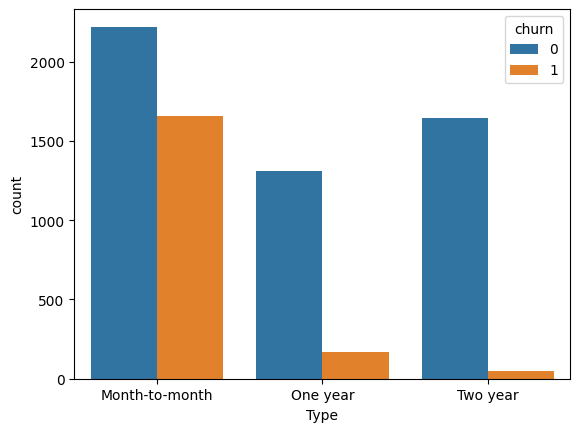

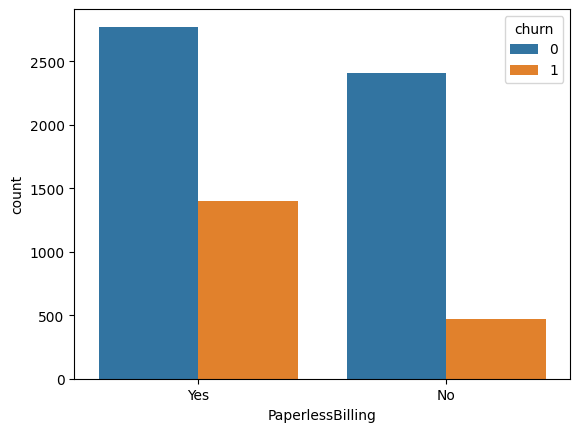

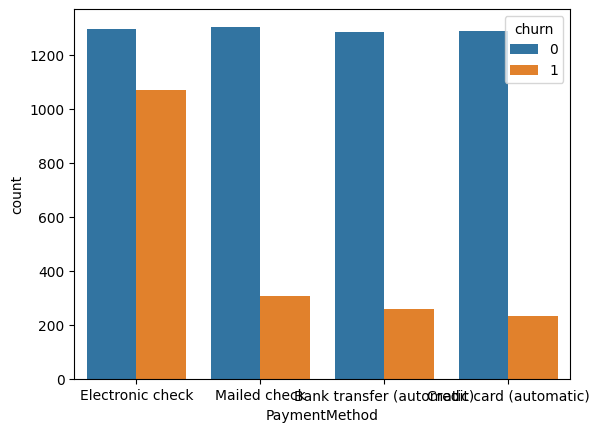

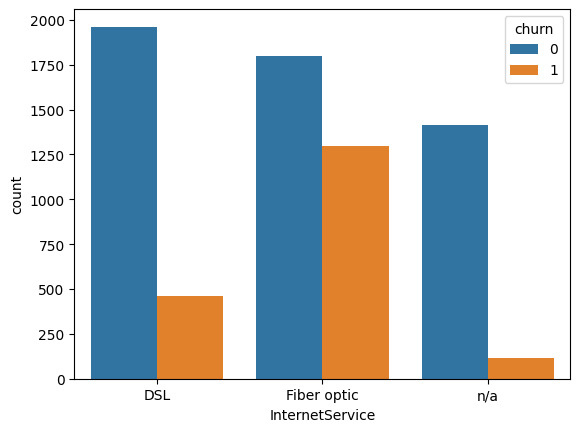

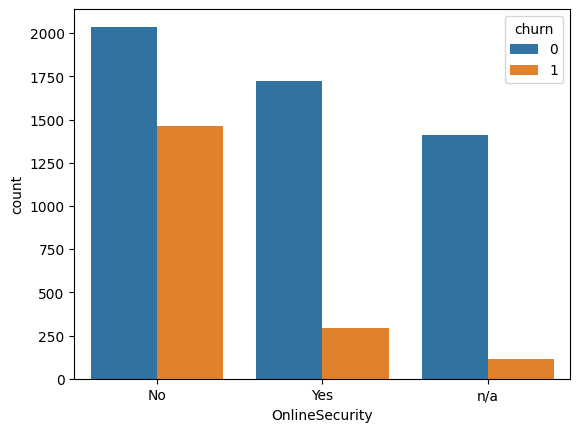

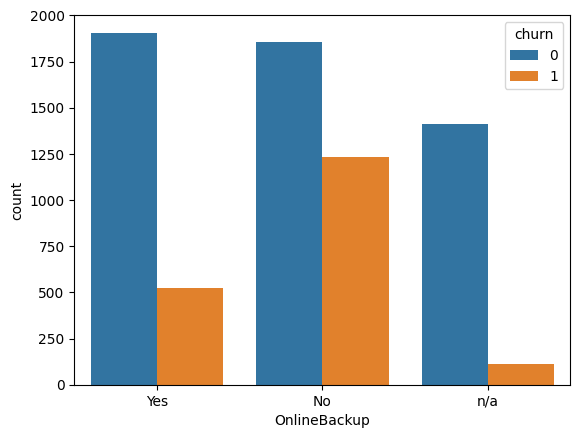

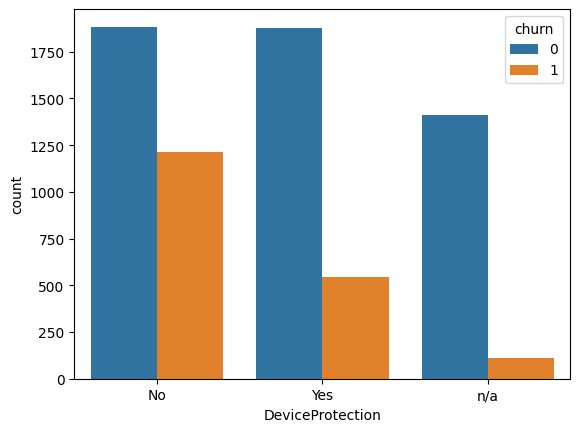

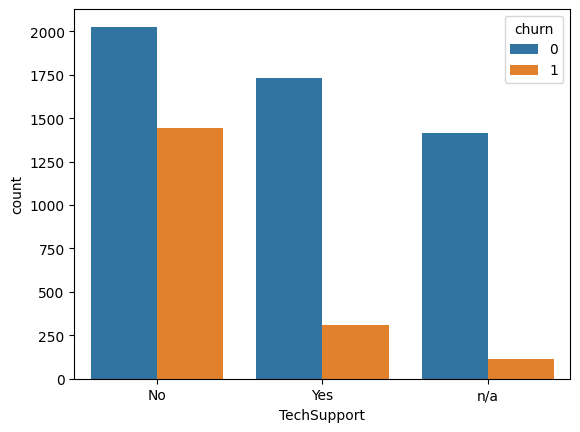

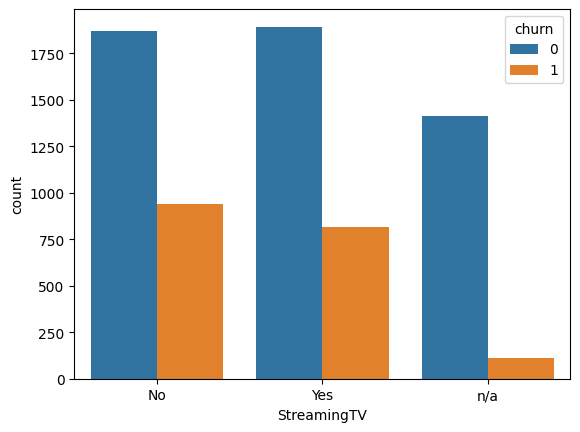

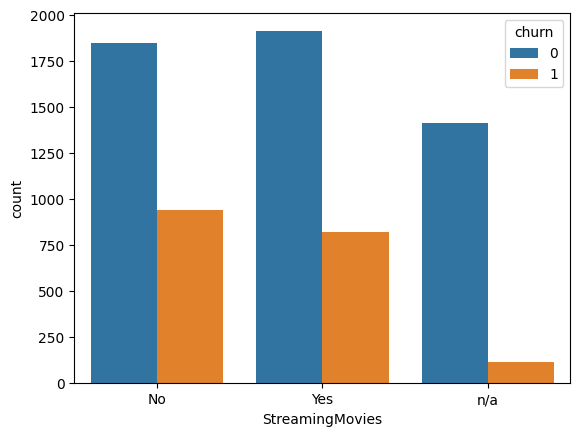

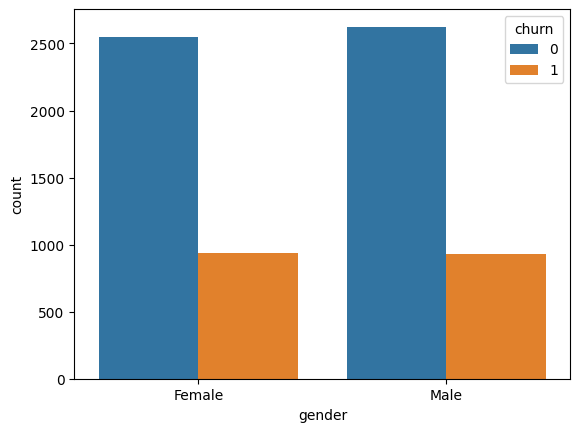

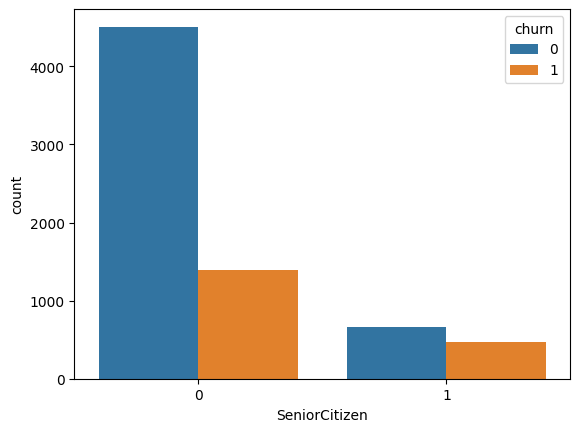

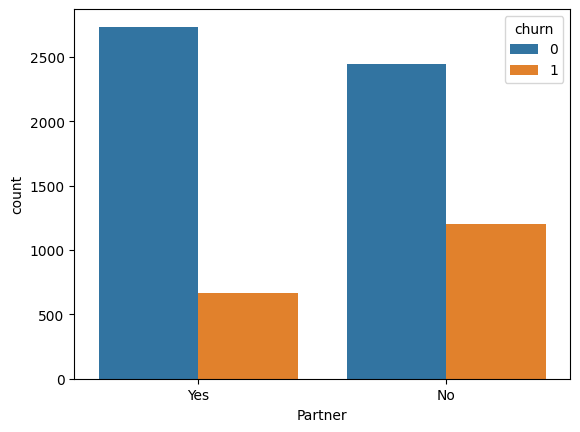

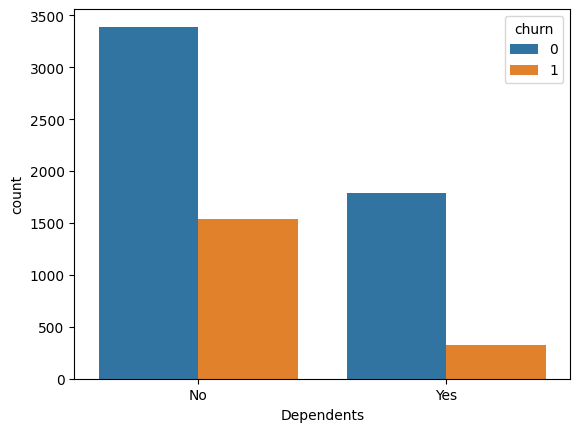

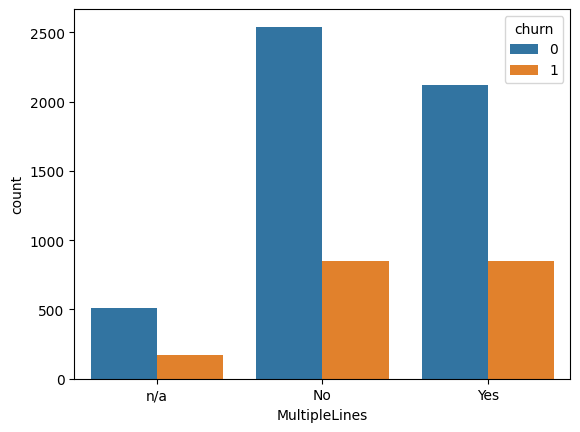

In [30]:
#Analisis grafico de distribucion de variables categoricas segun si se fugan o no

categoric_values = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines']

for i in categoric_values:
  data = merged_df[i]
  group = merged_df['churn']
  sns.countplot(x = data, hue = group)
  plt.show()


- De la observacion de los graficos surge que las caracteristicas que cuentan con un alto porcentaje de fuga (en torno al 50%)son clientes : MOnth to month,  con paperlessBilling,con electronic check, con servicio fiber optic, SInonline security, sin online back up, sin device protection, sin technical support, son senior citizen, sin partner ni dependants.

In [31]:
#Analisis de variable numericas
#creamos un df con datos de aquellos que se fugaron
df_churn = merged_df[merged_df['churn']==1]
df_no_churn = merged_df[merged_df['churn']==0]

,TotalCharges,MonthlyCharges
count,1869.000000,1869.000000
mean,1531.796094,74.441332
std,1890.822994,24.666053
min,18.850000,18.850000
25%,134.500000,56.150000
50%,703.550000,79.650000
75%,2331.300000,94.200000
max,8684.800000,118.350000


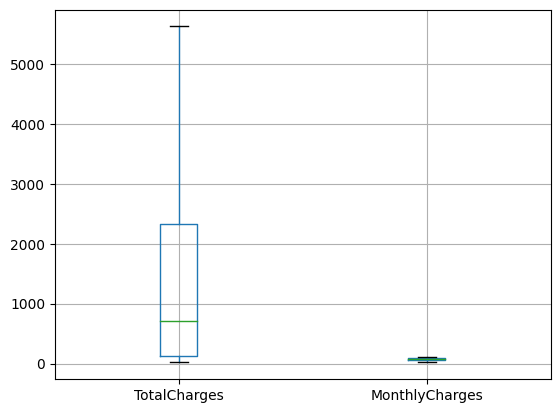

In [32]:
#Analisis de grupo de clientes con baja
df_churn[['TotalCharges', 'MonthlyCharges']].boxplot(showfliers= False)
df_churn[['TotalCharges', 'MonthlyCharges']].describe()

,TotalCharges,MonthlyCharges
count,5174.000000,5174.000000
mean,2549.911442,61.265124
std,2329.954215,31.092648
min,0.000000,18.250000
25%,572.900000,25.100000
50%,1679.525000,64.425000
75%,4262.850000,88.400000
max,8672.450000,118.750000


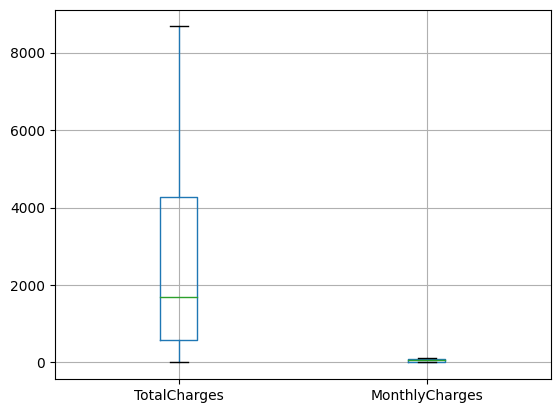

In [33]:
#Analisis de grupo de clientes sin baja
df_no_churn[['TotalCharges', 'MonthlyCharges']].boxplot()
df_no_churn[['TotalCharges', 'MonthlyCharges']].describe()

- Los clientes que no se dan de baja, cuentan con una media de  monthly charge 20% menor que los que se dan de baja
A su vez cuentan con una media de TOTAL CHARGES superior a los clientes que se han dado de baja seguramente debido a han acumulado mayor cantidad de cargos por haber permanecido mas tiempo

In [34]:
#Prueba de hipotesis. HIpotesis nula: la media de ambos grupos son iguales, hipoteis alternativa: las medias difieren

alpha = 0.05 # tu código: establece un nivel crítico de significación estadística

results = st.ttest_ind(df_churn['MonthlyCharges'], df_no_churn['MonthlyCharges'], equal_var=False)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)# tu código: imprime el valor p obtenido)


if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 8.59244933154705e-73
Rechazamos la hipótesis nula


Se realiza una prueba de hipotesis que permite confirmar que las medias de monthly charge de ambos grupos difieren con un grado de confianza de 95%

- Conclusiones:
  - Se preparaon los datos para su posterior analisis: se rellenaron valores ausentes y se agregaron datos necesarios para el analisis
  - DEl analisis preliminar se observa que las variables que mas impactan en la fuga de clientes son: los contratos month to month, los clientes que cuentan con electronic check y fiber optic, y clientes que no cuentan con online security ni technical support.
  - Las variables con menor impacto enla fuga son el genero y multiple lines

# 3- Plan de trabajo <a class="anchor" id="chapter3"></a>


- Plan de trabajo:
  - Se desarrollaran 6 modelos de machine learning para predecir a partir de los datos (caracteristicas), si un cliente se fugara.
  - Se seleccionara aquel modelo que cuente con las mejores metricas de performance (auc), y se determinaran cuales con las variables con mayor impacto en las predicciones y se comparan con las hipotesis aqui planteadas.
  


In [35]:
##########################

# 4- Solución de código <a class="anchor" id="chapter4"></a>



  4_1  Preparación de los datos y creación de conjuntos de entrenamiento, validacion y test <a class="anchor" id="section_4_1"></a>



- Se utilizarán modelos de clasificación dado que el objetivo es categeorico.
- Para la transformacieon de las características categóricas, utilizaremos One Hot Encoder para el modelo de Regresión logística y Ordinal encoder para los modelos de Arbol de Decisión y bosque aleatorio
- Se realizara tambien se realizará un escalado de variables numéricas

 - PREPARACION DE LOS DATOS PARA MODELOS DE REGRESION

In [36]:
# Se aplica OHE a las columnas CATEGORICAS
data_ohe = pd.get_dummies(merged_df, drop_first = False, columns = categoric_values)
data_ohe.head()

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,...,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_n/a
0,7590-VHVEG,2020-01-01,No,29.85,29.85,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,5575-GNVDE,2017-04-01,No,56.95,1889.50,0,0,1,0,1,...,1,1,0,1,0,1,0,1,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,53.85,108.15,1,1,0,0,0,...,1,1,0,1,0,1,0,1,0,0
3,7795-CFOCW,2016-05-01,No,42.30,1840.75,0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,70.70,151.65,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [37]:
# - Se separan las caracteristicas del objetivo. A su vez, se elimina del analisis la columnas: 'BeginDate', EndDate, customerID, ya que no aportan informacion

target_ohe = data_ohe['churn']
features_ohe = data_ohe.drop(['churn', 'BeginDate','EndDate', 'customerID'], axis=1)


In [38]:
# Se segmentan los datos en tres conjuntos (entrenamiento (60%), validacion (20%)y prueba (20%)).


features_ohe_train, features_ohe_valid, target_ohe_train, target_ohe_valid = train_test_split(features_ohe, target_ohe, test_size = 0.4, random_state= 12345)
features_ohe_test, features_ohe_valid, target_ohe_test, target_ohe_valid  = train_test_split(features_ohe_valid, target_ohe_valid, test_size = 0.5, random_state= 12345)


In [39]:
# Se escalan las caracteristicas numericas (por ser un modelo basado en regresion)

numeric = ['MonthlyCharges','TotalCharges']
scaler = StandardScaler()
scaler.fit(features_ohe_train[numeric])
features_ohe_train[numeric] = scaler.transform(features_ohe_train[numeric])
features_ohe_valid[numeric] = scaler.transform(features_ohe_valid[numeric])
features_ohe_test[numeric] = scaler.transform(features_ohe_test[numeric])

 - Preparación de datos para el modelo de árbol de desición y bosque aleatorio  

In [40]:
# Se utiiza  OrdinalEncoder para transformar variables categoricas

encoder =  OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(merged_df), columns = merged_df.columns)
data_ordinal

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn
0,5375.0,75.0,4.0,0.0,1.0,2.0,142.0,75.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1,3962.0,42.0,4.0,1.0,0.0,3.0,498.0,3625.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2564.0,72.0,2.0,0.0,1.0,3.0,436.0,537.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5535.0,31.0,4.0,1.0,0.0,0.0,266.0,3571.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
4,6511.0,71.0,1.0,0.0,1.0,2.0,729.0,675.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,52.0,4.0,1.0,1.0,3.0,991.0,3701.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
7039,1525.0,4.0,4.0,1.0,1.0,1.0,1340.0,6305.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7040,3367.0,65.0,4.0,0.0,1.0,2.0,137.0,1266.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
7041,5934.0,69.0,1.0,0.0,1.0,3.0,795.0,1158.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [41]:
# Se segmentan los datos en tres conjuntos (entrenamiento (60%), validacion (20%)y prueba (20%)). El tipo de plan es la variable objetivo
features_ord = data_ordinal.drop(['churn', 'BeginDate','EndDate', 'customerID'], axis=1)
target_ord = data_ordinal['churn']
features_ord_train, features_ord_valid, target_ord_train, target_ord_valid = train_test_split(features_ord, target_ord, test_size = 0.4, random_state= 12345)
features_ord_test, features_ord_valid, target_ord_test, target_ord_valid  = train_test_split(features_ord_valid, target_ord_valid, test_size = 0.5, random_state= 12345)
features_ord_train

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
836,1.0,0.0,1.0,742.0,5140.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1005,1.0,1.0,1.0,1205.0,5408.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4220,1.0,0.0,3.0,19.0,2508.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0
6543,1.0,0.0,1.0,454.0,4593.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
272,0.0,0.0,0.0,88.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,0.0,1.0,2.0,701.0,685.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3492,0.0,0.0,3.0,130.0,504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2177,2.0,1.0,1.0,1330.0,6352.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3557,0.0,1.0,0.0,532.0,3617.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0


 - Analisis de Equilibrio de clases

In [42]:
#Evauluación del  equilibrio de clases
churn_frequency = merged_df['churn'].value_counts(normalize=True)
churn_frequency

0    0.73463
1    0.26537
Name: churn, dtype: float64

- Se observa un fuerte desequilibrio de clases, por lo que se procede a balancerla y entrenar los modelos con la clase balanceada

In [43]:
# se crea una funcion para equilibrar las clases por SOBREMUESTRO

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] * int(repeat/2) + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros]*int(repeat/2) + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


In [44]:
## Equilibrio de clases para los datos ordinales utilizando la funcion Upsampled
features_ord_upsampled, target_ord_upsampled = upsample(
    features_ord_train, target_ord_train, 10)
target_ord_upsampled.value_counts(normalize=True)

0.0    0.586557
1.0    0.413443
Name: churn, dtype: float64

In [45]:
## Equilibrio de clases para los datos OHE utilizando la funcion Upsampled
features_ohe_upsampled, target_ohe_upsampled = upsample(
    features_ohe_train, target_ohe_train, 10)
target_ohe_upsampled.value_counts(normalize=True)

0    0.586557
1    0.413443
Name: churn, dtype: float64

  4_2  Desarrollo de modelos   <a class="anchor" id="section_4_2"></a>

- MODELO DE REGRESION LOGISTICA

In [46]:


#Entrenamiento y cálculo de auc-roc para el modelo de regresión logística

model_log = LogisticRegression(random_state=54321, solver='liblinear')  # se inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
model_log.fit(features_ohe_train, target_ohe_train) # se entrena el modelo en el conjunto de entrenamiento
predictions_log = model_log.predict(features_ohe_valid) # se predicen valores
auc_roc = roc_auc_score(target_ohe_valid, predictions_log)# se calcula auc roc en el conjunto de validación

f1_score_reg = f1_score(target_ohe_valid, predictions_log) # se calculaf1 score del mejor modelo


print(f'AUC-ROC Score del modelo de regresión logística : {auc_roc}')
print(f'F1 Score del modelo de regresión logística : {f1_score_reg}')


AUC-ROC Score del modelo de regresión logística : 0.7053039166527383
F1 Score del modelo de regresión logística : 0.5747126436781609


In [47]:
#Entrenamiento y cálculo de auc-roc para el modelo de regresión logística COn equilibrio de clases

model_log = LogisticRegression(random_state=54321, solver='liblinear', class_weight = 'balanced')  # se inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
model_log.fit(features_ohe_upsampled, target_ohe_upsampled) # se entrena el modelo en el conjunto de entrenamiento
predictions_log = model_log.predict(features_ohe_valid) # se predicen valores
auc_roc = roc_auc_score(target_ohe_valid, predictions_log)# se calcula auc roc en el conjunto de validación

f1_score_reg = f1_score(target_ohe_valid, predictions_log) # se calculaf1 score del mejor modelo


print(f'AUC-ROC Score del modelo de regresión logística : {auc_roc}')
print(f'F1 Score del modelo de regresión logística : {f1_score_reg}')


AUC-ROC Score del modelo de regresión logística : 0.7373049397535442
F1 Score del modelo de regresión logística : 0.6041237113402061


- MODELO DE ARBOL DE DECISION

In [48]:
#Entrenamiento y seleccion del mejor modelo de Arbol de decisión

best_model_decision_tree = None
best_result_decision_tree = 0
best_depth_decision_tree  = 0
for depth in range(1, 12):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth) #se crea el modelo con la profundidad depth
    model_tree.fit(features_ord_train, target_ord_train) # se entrena el modelo
    predictions_tree = model_tree.predict(features_ord_valid) # se obtienen las predicciones del modelo
    auc_roc_tree = roc_auc_score(target_ord_valid, predictions_tree) # se calcula auc score
    if auc_roc_tree> best_result_decision_tree:
        best_model_decision_tree = model_tree # guarda el modelo que corresponde a la mejor puntuacion de auc
        best_result_decision_tree = auc_roc_tree # guarda la mejor puntuacion de auc
        best_depth_decision_tree = depth # guarda la profundidad que corresponde a la mejor puntuacion de auc

best_prediction_tree = best_model_decision_tree.predict(features_ord_valid)
f1_score_tree = f1_score(target_ord_valid, best_prediction_tree) # se calculaf1 score del mejor modelo

print("Mejor modelo 'Arbol de decision':")
print("AUC_score:", best_result_decision_tree, "", "Profundidad:",  best_depth_decision_tree, "F1:",  f1_score_tree )


Mejor modelo 'Arbol de decision':
AUC_score: 0.7026967822973171  Profundidad: 2 F1: 0.564935064935065


In [49]:
#Entrenamiento y seleccion del mejor modelo de Arbol de decisión con clases equilibradas


best_model_decision_tree = None
best_result_decision_tree = 0
best_depth_decision_tree  = 0
for depth in range(1, 12):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth) #se crea el modelo con la profundidad depth
    model_tree.fit(features_ord_upsampled, target_ord_upsampled) # se entrena el modelo
    predictions_tree = model_tree.predict(features_ord_valid) # se obtienen las predicciones del modelo
    auc_roc_tree = roc_auc_score(target_ord_valid, predictions_tree) # se calcula auc score
    if auc_roc_tree> best_result_decision_tree:
        best_model_decision_tree = model_tree # guarda el modelo que corresponde a la mejor puntuacion de auc
        best_result_decision_tree = auc_roc_tree # guarda la mejor puntuacion de auc
        best_depth_decision_tree = depth # guarda la profundidad que corresponde a la mejor puntuacion de auc

best_prediction_tree = best_model_decision_tree.predict(features_ord_valid)
f1_score_tree = f1_score(target_ord_valid, best_prediction_tree) # se calculaf1 score del mejor modelo

print("Mejor modelo 'Arbol de decision con clases equilibradas':")
print("AUC_score:", best_result_decision_tree, "", "Profundidad:",  best_depth_decision_tree, "F1:",  f1_score_tree )


Mejor modelo 'Arbol de decision con clases equilibradas':
AUC_score: 0.7292366249829061  Profundidad: 5 F1: 0.5997719498289623


- MODELO DE BOSQUE ALEATORIO

In [50]:
#Entrenamiento y seleccion del mejor modelo de bosque aleatorio

best_score_random_forest = 0
best_est_random_forest = 0
best_depth_random_forest = 0
for est in range(1, 14): # selecciona el rango del hiperparámetro
    for depth in range(1,12):
        model_forest = RandomForestClassifier(random_state=54321, max_depth= depth, n_estimators=est) # configura el número de árboles
        model_forest.fit(features_ord_train, target_ord_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_forest = model_forest.predict(features_ord_valid)
        auc_score_forest = roc_auc_score(target_ord_valid, predictions_forest) # calcula la puntuación de f1 en el conjunto de validación
        if auc_score_forest > best_score_random_forest:
            best_model_forest = model_forest
            best_score_random_forest = auc_score_forest# guarda la mejor puntuación de F1 en el conjunto de validación
            best_est_random_forest = est# guarda el número de estimadores que corresponden a la mejor puntuación de F1
            best_depth_random_forest = depth # guarda la la profundidad que corresponde a la mejor puntacion den F1


best_prediction_forest = best_model_forest.predict(features_ord_valid)
f1_score_tree = f1_score(target_ord_valid, best_prediction_forest) # se calculaf1 score del mejor modelo


print("Mejor modelo 'Bosque Aleatorio':")
print("AUC_score:", best_score_random_forest, "", "Profundidad:",  best_depth_random_forest, "n_estimators:", best_est_random_forest)
print("F1:",  f1_score_tree )


Mejor modelo 'Bosque Aleatorio':
AUC_score: 0.6926924265216092  Profundidad: 10 n_estimators: 13
F1: 0.5545722713864307


In [51]:
##Entrenamiento y seleccion del mejor modelo de bosque aleatorio con clases equilibradas

best_score_random_forest = 0
best_est_random_forest = 0
best_depth_random_forest = 0
for est in range(1, 14): # selecciona el rango del hiperparámetro
    for depth in range(1,12):
        model_forest = RandomForestClassifier(random_state=54321, max_depth= depth, n_estimators=est) # configura el número de árboles
        model_forest.fit(features_ord_upsampled, target_ord_upsampled) # entrena el modelo en el conjunto de entrenamiento
        predictions_forest = model_forest.predict(features_ord_valid)
        auc_score_forest = roc_auc_score(target_ord_valid, predictions_forest) # calcula la puntuación de auc en el conjunto de validación
        if auc_score_forest > best_score_random_forest:
            best_model_forest = model_forest
            best_score_random_forest = auc_score_forest# guarda la mejor puntuación de AUC en el conjunto de validación
            best_est_random_forest = est# guarda el número de estimadores que corresponden a la mejor puntuación de auc
            best_depth_random_forest = depth # guarda la la profundidad que corresponde a la mejor puntacion den auc

best_prediction_forest = best_model_forest.predict(features_ord_valid)
f1_score_tree = f1_score(target_ord_valid, best_prediction_forest) # se calcula f1 score del mejor modelo


print("Mejor modelo 'Bosque Aleatorio con clases equilibradas':")
print("AUC_score:", best_score_random_forest, "", "Profundidad:",  best_depth_random_forest, "n_estimators:", best_est_random_forest)
print("F1:",  f1_score_tree )


Mejor modelo 'Bosque Aleatorio con clases equilibradas':
AUC_score: 0.7448528406241928  Profundidad: 7 n_estimators: 13
F1: 0.6214953271028038


 - MOdelo LGVM

In [52]:
#seleccion de hiperparametros modelo LGVM
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

In [53]:
lgb_model = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [54]:
grid_search.fit(features_ohe_train, target_ohe_train)

best_params = grid_search.best_params_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1101, number of negative: 3124
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260592 -> initscore=-1.042895
[LightGBM] [Info] Start training from score -1.042895


In [55]:
best_lgvm_model = lgb.LGBMClassifier(**best_params)
best_lgvm_model.fit(features_ohe_train, target_ohe_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1101, number of negative: 3124
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260592 -> initscore=-1.042895
[LightGBM] [Info] Start training from score -1.042895


LGBMClassifier(max_depth=10, n_estimators=50)

In [56]:
# Calculo de predicciones con mejor modelo entrenado
y_pred_lgvm = best_lgvm_model.predict(features_ohe_valid)

#  predicciones sean clases binarias (0 o 1)
y_pred_lgvm = np.round(y_pred_lgvm)

# Calcula el F1-score y auc
f1 = f1_score(target_ohe_valid, y_pred_lgvm)
print("F1 score LGVM", f1)
auc_roc_lgvm = roc_auc_score(target_ohe_valid, y_pred_lgvm)
print("AUC LGVM",auc_roc_lgvm)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
F1 score LGVM 0.549777117384844
AUC LGVM 0.6897839332654642


- GRADIENT BOOSTING

In [ ]:
# se Define el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Definicion  del espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Inicializa el objeto GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Entrenamiento el modelo con GridSearchCV
grid_search.fit(features_ohe_train, target_ohe_train)

# Obtiencion los mejores hiperparámetros
best_params = grid_search.best_params_

# Creacion y entrenamiento el modelo final con los mejores hiperparámetros
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(features_ohe_train, target_ohe_train)

In [ ]:
# Calculo de predicciones del mejor modelo entrenado
y_pred_gb = best_gb_model.predict(features_ohe_test)

# Calcula el F1-score
f1_gb = f1_score(target_ohe_test, y_pred_gb)
auc_gb = roc_auc_score(target_ohe_test, y_pred_gb)
print(f'El F1-score del mejor modelo de gradient boosting es: {f1_gb}')
print(f'El auc del mejor modelo de gradient boosting es: {auc_gb}')

- Red neuronal

In [ ]:

# Creacion del modelo de red neuronal

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(features_ohe_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilacion el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

# Entrenamiento del modelo
model.fit(features_ohe_train, target_ohe_train, epochs=18, batch_size=36, validation_data=(features_ohe_valid, target_ohe_valid))

# Evaluacion del modelo
pred_red = (model.predict(features_ohe_valid) > 0.5).astype(int)  # Convertir las probabilidades a etiquetas binarias

f1_score_red = f1_score(target_ohe_valid, pred_red) # se calculaf1 score del mejor modelo
auc_roc_red = roc_auc_score(target_ohe_valid, pred_red)# se calcula auc roc en el conjunto de validación
report_red = classification_report(target_ohe_valid, pred_red)


print("F1 red neuronal", f1_score_red)
print("AUC red neuronal" , auc_roc_red)


-

- Modelo de k- vecinos

In [ ]:

knn_model = KNeighborsClassifier()

# se define el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7],  # Prueba diferentes valores de k
    'weights': ['uniform', 'distance'],  # Prueba diferentes esquemas de ponderación
    'p': [1, 2]  # Prueba diferentes métricas de distancia (1 para Manhattan, 2 para Euclidiana)
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# se Entrena el modelo con GridSearchCV
grid_search.fit(features_ohe_train, target_ohe_train)

# se Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

# Crea y entrena el modelo final con los mejores hiperparámetros
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(features_ohe_train, target_ohe_train)

In [ ]:

#Evaluacion del modelo
pred_knn = best_knn_model.predict(features_ohe_valid)
accuracy = accuracy_score(target_ohe_valid, pred_knn)
report = classification_report(target_ohe_valid, pred_knn)
f1_score_knn = f1_score(target_ohe_valid, pred_knn) # se calculaf1 score del mejor modelo
auc_roc_knn = roc_auc_score(target_ohe_valid, pred_knn)# se calcula auc roc en el conjunto de validación


print(f'Precisión modelo K- vecinos: {accuracy}')

print(f'AUC  modelo K- vecinos: {auc_roc_knn}')

print(f'F!  modelo K- vecinos: {f1_score_knn}')
print('Informe de clasificación:')
print(report)


- EL modelo con mejores valores de F1 y auc es el de arbol de desicion
- se evaluan las caracteristicas con mayor importancia en el modelo

In [ ]:

# Obtener la importancia de características
importancias = best_model_decision_tree.feature_importances_
nombres_variables = features_ord_train.columns

# Crear un DataFrame para visualizar las importancias
importancia_df = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias})

# Ordenar por importancia para ver las variables más influyentes
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df)


# conclusiones
- EL modelo con mejores valores de F1 y auc es el de arbol de desicion, por lo tanto sera el que se utilizara para predecir los clientes que se fugaran
- Las variables con mayor importancia para el modelo son el tipo de contrato, por lo tanto las acciones de marketing para retener a un cliente deberan considerar principalmente dicho criterio


# 5- Informe <a class="anchor" id="chapter5"></a>


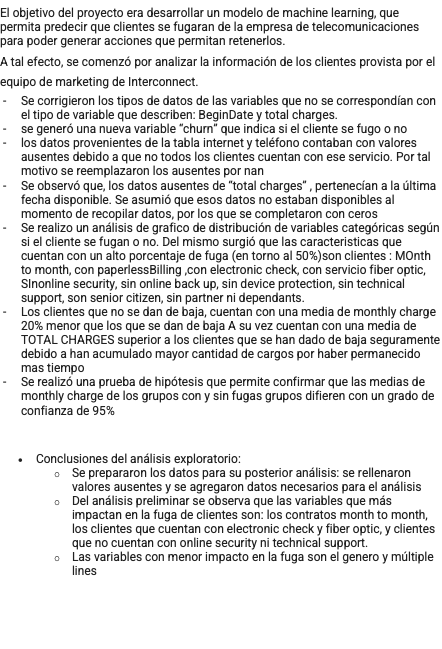